<a href="https://colab.research.google.com/github/GuruKanishka-A/my-projects/blob/main/medgemma_with_unsloth_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Adjustable parameters values(EXP 3)**
1. Learing Rate  -  3e-5
2. Epochs        -  15
3. Weight Decay  -  0.01
4. Batch size    -  16
5. Optimizer     - SGD
6. Loss          - MSELoss
7. Patience      - 5
8. LoRA Rank     - 8
9. LoRA Alpha    - 16
10. LoRA Dropout - 0.05

**Expectation**
1. Larger Batch
2. Balanced setup
3. Stable and Robust
4. Slower and may be smoother



In [ ]:
import os
if "COLAB_" not in "".join(os.environ.keys()):
    print("Installing Unsloth for local environment...")
    !pip install "unsloth[colab-new]@git+https://github.com/unslothai/unsloth.git"
else:
    print("Installing Unsloth for Colab environment...")
    !pip install --no-deps packaging ninja einops flash-attn xformers trl peft accelerate bitsandbytes
    !pip install --no-deps "unsloth[colab-new]@git+https://github.com/unslothai/unsloth.git"

Installing Unsloth for Colab environment...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 56.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Using cached ninja-1.11.1.4-py3-none-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (422 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.5/31.5 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 366.3/366.3 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 13.7 MB/s eta 0:00:00
  Created wheel for flash-attn: filename=flash_attn-2.7.4.post1-cp311-cp311-linux_x86_64.whl size=187831595 sha256=58853b28a5a926cae14402bfd8d4d93a45ebf8f9e79533f37ab09d0d77a99c05
  Stored in directory: /root/.cache/pip/wheels/3d/88/d8/284b89f56af7d5bf366b10d6b8e251ac8a7c7bf3f04203fb4f
Successfully built flash-attn
  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-install-ashgo97r/unsloth_8f68e6a2dbb742689d5bcade2bb76110
  Running command git clone --filter=blob:none --quiet https://git

In [ ]:
# -----------------------------------------------------------------------------
# Cell 0.2: Additional Library Installations
# -----------------------------------------------------------------------------
print("\nInstalling additional libraries for data processing and DICOM handling...")
!pip install -q pydicom pandas opencv-python Pillow scikit-learn matplotlib seaborn "huggingface_hub>=0.23.0" "hf_transfer>=0.1.6" "datasets>=2.16.0" sentencepiece protobuf

# Install unsloth_zoo
print("\nInstalling unsloth_zoo...")
!pip install unsloth_zoo


Installing additional libraries for data processing and DICOM handling...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 8.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu

In [ ]:
# -----------------------------------------------------------------------------
# Cell 0.3: Unsloth Model Loading
# -----------------------------------------------------------------------------
from unsloth import FastLanguageModel
import torch


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


    PyTorch 2.7.0+cu126 with CUDA 1206 (you have 2.6.0+cu124)
    Python  3.11.12 (you have 3.11.13)
  Please reinstall xformers (see https://github.com/facebookresearch/xformers#installing-xformers)
  Memory-efficient attention, SwiGLU, sparse and more won't be available.
  Set XFORMERS_MORE_DETAILS=1 for more details


🦥 Unsloth Zoo will now patch everything to make training faster!


In [ ]:
from unsloth import FastLanguageModel
import torch


# --- Model Selection ---

selected_model_name = "google/medgemma-4b-pt"

print(f"Attempting to load model: {selected_model_name}")
# When loading a multimodal model like MedGemma, FastLanguageModel handles it.
# The 'tokenizer' returned will be a multimodal processor (e.g., GemmaProcessor)
# which contains both the image_processor and the text_tokenizer.
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name=selected_model_name,
    max_seq_length=2048,  # Max sequence length for the language model part (less critical for pure vision regression)
    dtype=torch.float16,           # Autodetect
    load_in_4bit=True,    # Enable 4-bit quantization for memory efficiency

)
print(f"Model {selected_model_name} loaded successfully.")
print(f"Tokenizer type: {type(tokenizer)}")
print(f"Base model dtype after loading: {model.dtype}")

# --- Verify Image Processor and Get Vision Feature Dimension ---
# For MedGemma, the tokenizer is a GemmaProcessor which should have an 'image_processor'
if hasattr(tokenizer, 'image_processor') and tokenizer.image_processor is not None:
    print("Image processor found in tokenizer.")
    # The vision tower configuration is part of the main model's config for MedGemma
    if hasattr(model.config, 'vision_config'):
        vision_config = model.config.vision_config
        vision_feature_dim = vision_config.hidden_size
        print(f"Detected vision feature dimension from model.config.vision_config: {vision_feature_dim}")
    else:
        print("ERROR: model.config.vision_config not found. Cannot determine vision_feature_dim automatically.")
        base_model_ref = model.model if hasattr(model, 'model') else model
        if hasattr(base_model_ref, 'vision_tower') and hasattr(base_model_ref.vision_tower, 'config'):
            vision_feature_dim = base_model_ref.vision_tower.config.hidden_size
            print(f"Detected vision feature dimension from base_model.vision_tower.config: {vision_feature_dim}")
        else:
            vision_feature_dim = None
            print("ERROR: Could not access vision_tower.config. Manually inspect 'model' object and set vision_feature_dim.")
            # For medgemma-4b-pt, vision_feature_dim is 1024.
            if vision_feature_dim is None:
                print("Attempting to manually set vision_feature_dim to 1024 for MedGemma.")
                vision_feature_dim = 1024
else:
    print("ERROR: No image_processor found in the tokenizer. This is unexpected for MedGemma.")
    vision_feature_dim = 1024 # Fallback
    print(f"Attempting to manually set vision_feature_dim to {vision_feature_dim} due to missing image_processor.")


if vision_feature_dim is None:
    print("CRITICAL ERROR: vision_feature_dim could not be determined. Regression head cannot be initialized correctly.")

Attempting to load model: google/medgemma-4b-pt
==((====))==  Unsloth 2025.6.1: Fast Gemma3 patching. Transformers: 4.52.4.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Using float16 precision for gemma3 won't work! Using float32.


model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/133 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Model google/medgemma-4b-pt loaded successfully.
Tokenizer type: <class 'transformers.models.gemma3.processing_gemma3.Gemma3Processor'>
Base model dtype after loading: torch.bfloat16
Image processor found in tokenizer.
Detected vision feature dimension from model.config.vision_config: 1152


In [ ]:
# After loading the model with Unsloth:
# The actual path might be model.model.vision_tower if PEFT wraps it further
base_medgemma_model = model.model if hasattr(model, 'model') else model # Access base model if PEFT wrapped

if hasattr(base_medgemma_model, 'vision_tower') and hasattr(base_medgemma_model.vision_tower, 'config'):
    vision_config = base_medgemma_model.vision_tower.config
    vision_feature_dim = vision_config.hidden_size
    print(f"Detected vision feature dimension: {vision_feature_dim}")
    # Now define your regression head separately or as part of a wrapper
    # regression_head = torch.nn.Linear(vision_feature_dim, 1)
else:
    print("ERROR: Could not access model.vision_tower.config to get vision_feature_dim.")
    print("Please inspect the 'model' object structure from Unsloth carefully.")
    # You might need to print(model) and explore its attributes
    vision_feature_dim = None # Fallback

Detected vision feature dimension: 1152


In [ ]:
print("\n--- Applying PEFT (LoRA) ---")
# `model` is the Unsloth-loaded MedGemma model from the previous cell.
# We use get_peft_model for LoRA.
RANDOM_SEED=42
model = FastLanguageModel.get_peft_model(
    model,
    r=8,  # LoRA rank (higher can mean more expressiveness but more params)
    lora_alpha=16,  # LoRA alpha (scaling factor, often 2*r)
    lora_dropout=0.05,
    bias="none",
    use_gradient_checkpointing="unsloth", # Recommended by Unsloth
    random_state=RANDOM_SEED,
    target_modules=None, # Let Unsloth automatically find layers for LoRA.
                         # It should target both vision and language linear layers by default.
    finetune_vision_layers=True, # CRITICAL: Ensure vision tower layers are targeted for LoRA
    finetune_language_layers=False # OPTIONAL: For pure vision regression, we might not need to tune language layers.
                                  # Set to False if language model outputs are not used by the regression head.
                                  # If True (default), language LoRA adapters will also be trained.
)
print("PEFT (LoRA) adapters added to the MedGemma model.")
print("Trainable parameters after LoRA:")
model.print_trainable_parameters()


--- Applying PEFT (LoRA) ---
Unsloth: Making `base_model.model.model.vision_tower.vision_model` require gradients
PEFT (LoRA) adapters added to the MedGemma model.
Trainable parameters after LoRA:
trainable params: 8,695,296 || all params: 4,308,774,768 || trainable%: 0.2018


In [ ]:
import torch.nn as nn

class MedGemmaVisionRegressor(nn.Module):
    def __init__(self, peft_medgemma_model, vision_feature_dim_input: int):
        super().__init__()
        self.medgemma_model = peft_medgemma_model # This is the PEFT-adapted model from Unsloth
        self.target_dtype = self.medgemma_model.dtype # Should be torch.float16 now
        print(f"[Regressor Init] Base PEFT model target dtype: {self.target_dtype}")


        # The regression head takes the pooled vision features and outputs 1 ASL?ALT ratio value
        self.regression_head = nn.Sequential(
            nn.Linear(vision_feature_dim_input, vision_feature_dim_input // 2), # Intermediate layer
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(vision_feature_dim_input // 2, 1) # Output layer
        )

        # Note: Freezing of base MedGemma layers is handled by Unsloth's PEFT.
        # LoRA adapters are trainable. The regression_head is also trainable.
        if self.target_dtype == torch.float16: # Explicitly check for float16
            print(f"[Regressor Init] Casting regression_head to {self.target_dtype}.")
            self.regression_head = self.regression_head.to(dtype=self.target_dtype)
        elif self.target_dtype is not None: # If it's something else, print a warning but still cast
            print(f"[Regressor Init] WARNING: Base model dtype is {self.target_dtype}, not float16. Casting regression_head to {self.target_dtype} anyway.")
            self.regression_head = self.regression_head.to(dtype=self.target_dtype)


    def forward(self, pixel_values: torch.Tensor) -> torch.Tensor:

        base_model = self.medgemma_model.model # Access the original model underlying PEFT
        vision_outputs = base_model.vision_tower(pixel_values=pixel_values, return_dict=True)
        image_features = vision_outputs.pooler_output

        if image_features is None:
          if hasattr(vision_outputs, 'last_hidden_state'):
                image_features = vision_outputs.last_hidden_state[:, 0, :] # CLS token embedding
          else:
                raise ValueError("Could not extract pooled image features (pooler_output or CLS token) from vision_tower output.")

        # Ensure image_features are in float16 before feeding to regression_head
        if image_features.dtype != self.target_dtype:
            image_features = image_features.to(self.target_dtype)

        # Pass vision features through the regression head
        asl_alt_ratio_prediction = self.regression_head(image_features)
        return asl_alt_ratio_prediction

# --- Instantiate the Regressor Model ---
if vision_feature_dim is not None:
    # `model` here is the PEFT-adapted MedGemma model from Cell 0.4
    regressor_model = MedGemmaVisionRegressor(model, vision_feature_dim)
    print(f"MedGemmaVisionRegressor created with regression head input dim {vision_feature_dim}.")

    # Move to GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    regressor_model.to(device)
    print(f"Regressor model moved to {device}.")

    print("\nTrainable parameters of the Regressor Model (includes LoRA + head):")
    total_params = 0
    trainable_params = 0
    for name, param in regressor_model.named_parameters():
        total_params += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
            # print(f"Trainable: {name}, Shape: {param.shape}") # Uncomment to see all trainable params
    print(f"Total parameters in RegressorModel: {total_params:,}")
    print(f"Trainable parameters in RegressorModel: {trainable_params:,} ({100 * trainable_params / total_params:.2f}%)")

else:
    regressor_model = None
    print("CRITICAL ERROR: Cannot create MedGemmaVisionRegressor because vision_feature_dim is None.")

[Regressor Init] Base PEFT model target dtype: torch.bfloat16
[Regressor Init] WARNING: Base model dtype is torch.bfloat16, not float16. Casting regression_head to torch.bfloat16 anyway.
MedGemmaVisionRegressor created with regression head input dim 1152.
Regressor model moved to cuda.

Trainable parameters of the Regressor Model (includes LoRA + head):
Total parameters in RegressorModel: 2,499,582,961
Trainable parameters in RegressorModel: 9,360,001 (0.37%)


In [ ]:
# -----------------------------------------------------------------------------
# Cell 1 (REVISED): Installs and PyTorch/HuggingFace Imports
# -----------------------------------------------------------------------------
print("Installing/Updating PyTorch, Hugging Face, and related libraries for MedGemma...")
# Install PyTorch first (cu118 is common for Colab T4/V100 GPUs)
#!pip install -q -U torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

# Install Hugging Face and other necessary libraries
# Let pip resolve numpy and scikit-learn based on these packages' needs
#!pip install -q -U transformers accelerate bitsandbytes peft pydicom pandas opencv-python Pillow scikit-learn

# No explicit numpy install/uninstall here; let other packages specify their needs.
# pydicom, pandas, opencv-python, Pillow are generally fine with default versions.

print("\nImporting libraries...")
# Python Standard Libraries
import os
import shutil
import zipfile

# Third-party Libraries
import pandas as pd
import numpy as np # Should be a compatible version now
import pydicom
import cv2
from PIL import Image

# PyTorch
import torch
from torch.utils.data import Dataset, DataLoader

# Scikit-learn (should import fine after pip installs a compatible version)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Hugging Face Transformers
from transformers import AutoProcessor
import tensorflow as tf

# Plotting (optional, but often useful)
import matplotlib.pyplot as plt
import seaborn as sns

# Colab specific (if needed)
from google.colab import drive # Moved drive mount to Cell 2

print("--- Library Version Checks ---")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Scikit-learn version: {pd.__version__}") # Oops, should be sklearn.__version__
import sklearn
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"TensorFlow Version: {tf.__version__}")
if torch.cuda.is_available():
    print(f"PyTorch version: {torch.__version__}")
    print(f"PyTorch CUDA version: {torch.version.cuda}")
    print(f"GPU available for PyTorch: {torch.cuda.get_device_name(0)}")
else:
    print("GPU not available for PyTorch, using CPU.")
print(f"GPU Available for TensorFlow: {tf.config.list_physical_devices('GPU')}")


# For reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
if 'torch' in globals(): # Check if torch was successfully imported
    torch.manual_seed(RANDOM_SEED)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(RANDOM_SEED)

print("\nCell 1: Installs and Imports complete.")

Installing/Updating PyTorch, Hugging Face, and related libraries for MedGemma...

Importing libraries...
--- Library Version Checks ---
Pandas version: 2.2.2
NumPy version: 2.0.2
Scikit-learn version: 2.2.2
Scikit-learn version: 1.6.1
TensorFlow Version: 2.18.0
PyTorch version: 2.6.0+cu124
PyTorch CUDA version: 12.4
GPU available for PyTorch: Tesla T4
GPU Available for TensorFlow: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Cell 1: Installs and Imports complete.


In [ ]:
if 'drive' not in globals(): # If drive wasn't imported/mounted in Cell 1
    from google.colab import drive
drive.mount('/content/drive', force_remount=True) # force_remount if running again

# --- Configuration ---
DRIVE_CSV_PATH = "/content/data.csv"
DRIVE_ZIP_PATH = "/content/drive/MyDrive/1000"


LOCAL_EXTRACT_PATH = "/content/medgemma_extracted_images" # Using the MedGemma specific path
LOCAL_IMAGES_ROOT = os.path.join(LOCAL_EXTRACT_PATH, "/content/drive/MyDrive/1000")
LOCAL_CSV_PATH = "/content/medgemma_cp.csv" # Using the MedGemma specific path


# --- Copy CSV File ---
if os.path.exists(DRIVE_CSV_PATH):
    shutil.copy(DRIVE_CSV_PATH, LOCAL_CSV_PATH)
    print(f"CSV copied to {LOCAL_CSV_PATH}")
else:
    print(f"ERROR: CSV file not found at {DRIVE_CSV_PATH}")

# --- Prepare Image Directory ---
if os.path.exists(LOCAL_EXTRACT_PATH):
    print(f"Removing existing extraction directory: {LOCAL_EXTRACT_PATH}")
    shutil.rmtree(LOCAL_EXTRACT_PATH)
os.makedirs(LOCAL_EXTRACT_PATH, exist_ok=True)
print(f"Created local extraction directory: {LOCAL_EXTRACT_PATH}")

# --- Check Image Folder (Already Unzipped) ---
if os.path.exists(LOCAL_IMAGES_ROOT):
    print(f"Image root folder found at: {LOCAL_IMAGES_ROOT}")
else:
    print(f"ERROR: Expected image root folder '{LOCAL_IMAGES_ROOT}' not found.")

print("\nCell 2: Data preparation complete (Unzipping skipped).")


Mounted at /content/drive
CSV copied to /content/medgemma_cp.csv
Removing existing extraction directory: /content/medgemma_extracted_images
Created local extraction directory: /content/medgemma_extracted_images
Image root folder found at: /content/drive/MyDrive/1000

Cell 2: Data preparation complete (Unzipping skipped).


In [ ]:
image_df = pd.DataFrame() # Initialize to ensure it exists

if not os.path.exists(LOCAL_CSV_PATH):
    print(f"FATAL ERROR: Clinical CSV file not found at the expected local path: {LOCAL_CSV_PATH}")
else:
    df_raw_from_cell3 = pd.read_csv(LOCAL_CSV_PATH) # Use a distinct name to avoid confusion
    print(f"Initial number of rows in clinical data (Cell 3): {len(df_raw_from_cell3)}")

    # IMPORTANT: Verify these column names EXACTLY match your CSV file
    person_id_col_name_c3 = 'patient_id'
    asl_alt_ratio_col_name_c3 = "asl_alt_ratio"

    if not (person_id_col_name_c3 in df_raw_from_cell3.columns and asl_alt_ratio_col_name_c3 in df_raw_from_cell3.columns):
        print(f"ERROR: Required columns ('{person_id_col_name_c3}' or '{asl_alt_ratio_col_name_c3}') not found in CSV.")
        print(f"Available columns: {df_raw_from_cell3.columns.tolist()}")
    else:
        # Select and clean
        df_selected_c3 = df_raw_from_cell3[[person_id_col_name_c3, asl_alt_ratio_col_name_c3]].copy()
        df_selected_c3.rename(columns={asl_alt_ratio_col_name_c3: 'ASL/ALT Ratio'}, inplace=True) # Use temp name
        df_selected_c3['ASL/ALT Ratio'] = pd.to_numeric(df_selected_c3['ASL/ALT Ratio'], errors='coerce')
        df_selected_c3.dropna(subset=['ASL/ALT Ratio'], inplace=True)
        df_selected_c3[person_id_col_name_c3] = df_selected_c3[person_id_col_name_c3].astype(str)
        print(f"Cleaned clinical data: {len(df_selected_c3)} records.")

        asl_alt_ratio_lookup_c3 = df_selected_c3.set_index(person_id_col_name_c3)['ASL/ALT Ratio'].to_dict()

        # Map to images
        if not (os.path.exists(LOCAL_IMAGES_ROOT) and os.path.isdir(LOCAL_IMAGES_ROOT)):
            print(f"FATAL ERROR: Images root path '{LOCAL_IMAGES_ROOT}' does not exist or is not a directory.")
        else:
            available_folders_c3 = set(os.listdir(LOCAL_IMAGES_ROOT))
            valid_ids_clinical_c3 = set(asl_alt_ratio_lookup_c3.keys())
            common_person_ids_c3 = sorted(list(valid_ids_clinical_c3 & available_folders_c3))
            print(f"Found {len(common_person_ids_c3)} common person_ids for mapping.")

            image_records_list = []
            for pid_c3 in common_person_ids_c3:
                folder_path_c3 = os.path.join(LOCAL_IMAGES_ROOT, pid_c3)
                asl_alt_ratio_val_c3 = asl_alt_ratio_lookup_c3[pid_c3]
                if os.path.isdir(folder_path_c3):
                    for filename_c3 in os.listdir(folder_path_c3):
                        if filename_c3.lower().endswith(".dcm"):
                            image_path_c3 = os.path.join(folder_path_c3, filename_c3)
                            image_records_list.append({
                                "person_id": pid_c3, # Final column name
                                "image_path": image_path_c3, # Final column name
                                "ASL/ALT Ratio": asl_alt_ratio_val_c3 # Final column name
                            })
            image_df = pd.DataFrame(image_records_list) # Assign to the main image_df
            if not image_df.empty:
                print(f"Final image_df created with {len(image_df)} image-asl/alt pairs.")
                print(image_df.head())
                print(f"ASL/ALT Ratio stats in final image_df: min={image_df['ASL/ALT Ratio'].min()}, max={image_df['ASL/ALT Ratio'].max()}, mean={image_df['ASL/ALT Ratio'].mean()}")
            else:
                print("WARNING: image_df is empty after mapping. Check paths and IDs.")
print("\nCell 3: image_df preparation complete.")

Initial number of rows in clinical data (Cell 3): 1000
Cleaned clinical data: 974 records.
Found 528 common person_ids for mapping.
Final image_df created with 974 image-asl/alt pairs.
  person_id                                         image_path  ASL/ALT Ratio
0      1002  /content/drive/MyDrive/1000/1002/1002_eidon_mo...       1.150000
1      1004  /content/drive/MyDrive/1000/1004/1004_eidon_mo...       0.666667
2      1004  /content/drive/MyDrive/1000/1004/1004_eidon_mo...       0.666667
3      1005  /content/drive/MyDrive/1000/1005/1005_eidon_mo...       1.047619
4      1007  /content/drive/MyDrive/1000/1007/1007_eidon_mo...       1.357143
ASL/ALT Ratio stats in final image_df: min=0.3432835820895522, max=2.625, mean=1.032324363611882

Cell 3: image_df preparation complete.


In [ ]:
# VERIFY `image_df` IS READY FROM YOUR PREVIOUS CELLS
if 'image_df' in locals() and isinstance(image_df, pd.DataFrame) and not image_df.empty:
    print(f"Continuing with 'image_df' which has {len(image_df)} records.")
    print("Columns in image_df:", image_df.columns.tolist())
    from IPython.display import display
    print("Sample of image_df:")
    display(image_df.head()) # Use display for better DataFrame formatting in Colab

    required_cols = ['person_id', 'image_path', 'ASL/ALT Ratio']
    if not all(col in image_df.columns for col in required_cols):
        print(f"ERROR: 'image_df' is missing one or more required columns: {required_cols}. Please re-run previous data preparation cells.")
    else:
        print("'image_df' seems okay to proceed.")
else:
    print("ERROR: 'image_df' not found or is empty. Please ensure your data preparation cells (your original Cells 1-3, now adapted) have been run successfully.")
    # In a real run, you'd stop and fix. For script flow, create empty to avoid NameError.
    if 'image_df' not in locals() or not isinstance(image_df, pd.DataFrame):
        image_df = pd.DataFrame(columns=['person_id', 'image_path', 'ASL/ALT Ratio'])


print(f"\nUsing Unsloth loaded model: {selected_model_name}") # From Cell 0.3
print("\nCell 4: image_df verification and Model ID check complete.")

Continuing with 'image_df' which has 974 records.
Columns in image_df: ['person_id', 'image_path', 'ASL/ALT Ratio']
Sample of image_df:


,person_id,image_path,ASL/ALT Ratio
0,1002,/content/drive/MyDrive/1000/1002/1002_eidon_mo...,1.150000
1,1004,/content/drive/MyDrive/1000/1004/1004_eidon_mo...,0.666667
2,1004,/content/drive/MyDrive/1000/1004/1004_eidon_mo...,0.666667
3,1005,/content/drive/MyDrive/1000/1005/1005_eidon_mo...,1.047619
4,1007,/content/drive/MyDrive/1000/1007/1007_eidon_mo...,1.357143


'image_df' seems okay to proceed.

Using Unsloth loaded model: google/medgemma-4b-pt

Cell 4: image_df verification and Model ID check complete.


In [ ]:

print("\n--- Inspecting MedGemma Image Processor ---")
TARGET_SIZE_FOR_IMAGES = None # Will be determined by the image_processor

if 'tokenizer' in locals() and hasattr(tokenizer, 'image_processor') and tokenizer.image_processor is not None:
    medgemma_image_processor = tokenizer.image_processor
    print(f"MedGemma Image Processor Type: {type(medgemma_image_processor)}")

    # The image processor config usually has 'size' information.
    # For SigLIPImageProcessor (used by MedGemma), it's often under `size` directly.
    # The 'size' attribute can be an int (for shortest_edge) or a dict {'height': H, 'width': W}.
    if hasattr(medgemma_image_processor, 'size'):
        size_info = medgemma_image_processor.size
        print(f"  Image processor 'size' attribute: {size_info}")
        if isinstance(size_info, int):
            if hasattr(medgemma_image_processor, 'crop_size') and medgemma_image_processor.crop_size is not None:
                crop_info = medgemma_image_processor.crop_size
                if isinstance(crop_info, int):
                    TARGET_SIZE_FOR_IMAGES = (crop_info, crop_info)
                elif isinstance(crop_info, dict) and 'height' in crop_info and 'width' in crop_info:
                    TARGET_SIZE_FOR_IMAGES = (crop_info['height'], crop_info['width'])
                print(f"  Using 'crop_size' for TARGET_SIZE_FOR_IMAGES: {TARGET_SIZE_FOR_IMAGES}")

            if TARGET_SIZE_FOR_IMAGES is None:
                 TARGET_SIZE_FOR_IMAGES = (size_info, size_info)
                 print(f"  Using 'size' attribute for TARGET_SIZE_FOR_IMAGES (assuming square): {TARGET_SIZE_FOR_IMAGES}")

        elif isinstance(size_info, dict) and 'height' in size_info and 'width' in size_info:
            TARGET_SIZE_FOR_IMAGES = (size_info['height'], size_info['width'])
            print(f"  Using 'size' dict for TARGET_SIZE_FOR_IMAGES: {TARGET_SIZE_FOR_IMAGES}")
        else:
            print("  Could not determine target size from image_processor.size. Check processor config.")
    else:
        print("  Image processor does not have a direct 'size' attribute. Check its config details.")

    # Fallback if still not found, to MedGemma paper's mentioned size
    if TARGET_SIZE_FOR_IMAGES is None:
        TARGET_SIZE_FOR_IMAGES = (896, 896) # Default from MedGemma paper if not found in processor
        print(f"  Falling back to default TARGET_SIZE_FOR_IMAGES: {TARGET_SIZE_FOR_IMAGES} (from MedGemma paper)")
else:
    print("ERROR: MedGemma image_processor not found in tokenizer. Cannot determine target image size.")
    TARGET_SIZE_FOR_IMAGES = (896, 896) # Fallback
    print(f"  Using fallback TARGET_SIZE_FOR_IMAGES: {TARGET_SIZE_FOR_IMAGES}")

print(f"Final TARGET_SIZE_FOR_IMAGES to be used by Dataset (if processor fails or for reference): {TARGET_SIZE_FOR_IMAGES}")
print("\nCell 5: MedGemma image processor check complete.")


--- Inspecting MedGemma Image Processor ---
MedGemma Image Processor Type: <class 'transformers.models.gemma3.image_processing_gemma3.Gemma3ImageProcessor'>
  Image processor 'size' attribute: {'height': 896, 'width': 896}
  Using 'size' dict for TARGET_SIZE_FOR_IMAGES: (896, 896)
Final TARGET_SIZE_FOR_IMAGES to be used by Dataset (if processor fails or for reference): (896, 896)

Cell 5: MedGemma image processor check complete.


In [ ]:
train_df, val_df, test_df = pd.DataFrame(), pd.DataFrame(), pd.DataFrame() # Initialize
asl_alt_ratio_scaler = None # Will store the fitted StandardScaler

if 'image_df' in locals() and not image_df.empty:
    print(f"\nStarting data splitting for {len(image_df)} image-asl/alt pairs...")
    if 'person_id' not in image_df.columns:
        print("ERROR: 'person_id' column missing in image_df. Cannot perform patient-level split. Please check image_df preparation.")
    else:
        unique_person_ids = image_df['person_id'].unique()
        print(f"Total unique patients for splitting: {len(unique_person_ids)}")

        if len(unique_person_ids) < 3:
            print("Warning: Not enough unique patients for a robust 3-way (train/validation/test) split.")
            # Simplified split logic for few patients (adjust as needed for your minimum requirements)
            if len(unique_person_ids) == 2:
                train_pids, val_pids = train_test_split(unique_person_ids, test_size=0.5, random_state=RANDOM_SEED)
                test_pids = np.array([]) # Empty array for consistency
            elif len(unique_person_ids) == 1:
                train_pids = unique_person_ids
                val_pids, test_pids = np.array([]), np.array([])
            else: # 0 patients
                train_pids, val_pids, test_pids = np.array([]), np.array([]), np.array([])
        else:
            # Standard 70% train, 15% validation, 15% test split of person_ids
            train_pids, temp_pids = train_test_split(
                unique_person_ids, test_size=0.30, random_state=RANDOM_SEED
            )
            if len(temp_pids) > 1 : # Ensure there's at least 2 for val/test split
                 val_pids, test_pids = train_test_split(
                    temp_pids, test_size=0.50, random_state=RANDOM_SEED
                )
            elif len(temp_pids) == 1: # Only one patient left
                val_pids = temp_pids
                test_pids = np.array([])
            else:
                val_pids, test_pids = np.array([]), np.array([])


        train_df = image_df[image_df['person_id'].isin(train_pids)].copy()
        val_df = image_df[image_df['person_id'].isin(val_pids)].copy()
        test_df = image_df[image_df['person_id'].isin(test_pids)].copy()

        print(f"Train set: {len(train_df)} samples from {len(train_pids)} patients.")
        print(f"Validation set: {len(val_df)} samples from {len(val_pids)} patients.")
        print(f"Test set: {len(test_df)} samples from {len(test_pids)} patients.")

        # Sanity check for patient overlap - important!
        if len(train_pids)>0 and len(val_pids)>0: assert len(set(train_pids) & set(val_pids)) == 0, "Patient overlap train/val!"
        if len(train_pids)>0 and len(test_pids)>0: assert len(set(train_pids) & set(test_pids)) == 0, "Patient overlap train/test!"
        if len(val_pids)>0 and len(test_pids)>0: assert len(set(val_pids) & set(test_pids)) == 0, "Patient overlap val/test!"
        print("Patient-level splits verified (no overlap if sets are non-empty).")

        # --- LDL Value Normalization ---
        if not train_df.empty and 'ASL/ALT Ratio' in train_df.columns:
            print("\nNormalizing ASL/ALT Ratio values using StandardScaler...")
            asl_alt_ratio_scaler = StandardScaler()
            # Fit the scaler ONLY on the training data's LDL values
            train_df['asl/alt_scaled'] = asl_alt_ratio_scaler.fit_transform(train_df[['ASL/ALT Ratio']])

            # Transform validation and test data using the FITTED scaler
            if not val_df.empty:
                val_df['asl/alt_scaled'] = asl_alt_ratio_scaler.transform(val_df[['ASL/ALT Ratio']])
            else:
                # Add LDL_scaled column even if empty, for consistency
                val_df['asl/alt_scaled'] = pd.Series(dtype='float64')

            if not test_df.empty:
                test_df['asl/alt_scaled'] = asl_alt_ratio_scaler.transform(test_df[['ASL/ALT Ratio']])
            else:
                test_df['asl/alt_scaled'] = pd.Series(dtype='float64')


            print("ASL/ALT Ratio normalization complete.")
            print("Scaled ASL/ALT Ratio stats in train_df (should be mean~0, std~1):")
            display(train_df['asl/alt_scaled'].describe())

        else:
            print("Train DataFrame is empty or 'asl/alt ratio' column missing. Skipping LDL normalization.")
else:
    print("image_df is empty (from Cell 3). Skipping data splitting and asl/alt ratio normalization.")

print("\nCell 6: Data splitting and asl/alt normalization attempt complete.")


Starting data splitting for 974 image-asl/alt pairs...
Total unique patients for splitting: 528
Train set: 684 samples from 369 patients.
Validation set: 147 samples from 79 patients.
Test set: 143 samples from 80 patients.
Patient-level splits verified (no overlap if sets are non-empty).

Normalizing ASL/ALT Ratio values using StandardScaler...
ASL/ALT Ratio normalization complete.
Scaled ASL/ALT Ratio stats in train_df (should be mean~0, std~1):


,asl/alt_scaled
count,6.840000e+02
mean,2.285371e-16
std,1.000732e+00
min,-1.805603e+00
25%,-7.087348e-01
50%,-1.332477e-01
75%,4.596783e-01
max,5.166029e+00



Cell 6: Data splitting and asl/alt normalization attempt complete.


In [ ]:
# -----------------------------------------------------------------------------
# Cell 5.1 (from user, now Cell 6.1): Check Unsloth tokenizer/model.processor
# -----------------------------------------------------------------------------
print("\n--- Sanity Check for Unsloth Components (Cell 6.1) ---")
if 'tokenizer' in locals() and tokenizer is not None:
    print(f"Unsloth tokenizer IS LOADED. Type: {type(tokenizer)}")
    if hasattr(tokenizer, 'image_processor') and tokenizer.image_processor is not None:
        print(f"  It has a tokenizer.image_processor of type: {type(tokenizer.image_processor)}")
    else:
        print("  It does NOT have a direct `tokenizer.image_processor` attribute (or it's None).")

    if hasattr(model, 'processor') and model.processor is not None:
        print(f"Unsloth model.processor IS LOADED. Type: {type(model.processor)}")
        if hasattr(model.processor, 'image_processor') and model.processor.image_processor is not None:
             print(f"  model.processor has an image_processor component of type: {type(model.processor.image_processor)}")
    else:
        print("  The model does NOT have a `model.processor` attribute (or it's None).")

    if not (hasattr(tokenizer, 'image_processor') and tokenizer.image_processor is not None) and \
       not (hasattr(model, 'processor') and model.processor is not None and hasattr(model.processor, 'image_processor')):
        print(f"  WARNING: No obvious image processor found. The model '{selected_model_name}' may be text-only.")
        print("  If your task requires image input, ensure you've selected a vision-language model and that Unsloth loads its image processor correctly.")
else:
    print("Unsloth tokenizer IS NOT LOADED or is None.")


--- Sanity Check for Unsloth Components (Cell 6.1) ---
Unsloth tokenizer IS LOADED. Type: <class 'transformers.models.gemma3.processing_gemma3.Gemma3Processor'>
  It has a tokenizer.image_processor of type: <class 'transformers.models.gemma3.image_processing_gemma3.Gemma3ImageProcessor'>
  The model does NOT have a `model.processor` attribute (or it's None).


In [ ]:
# -----------------------------------------------------------------------------
# Cell 7: Custom PyTorch Dataset for DICOM Images and LDL (New Cell)
# -----------------------------------------------------------------------------
# Helper for printing messages only once during dataset iteration or training
printed_messages_dataset = set()
def print_once_dataset(message):
    global printed_messages_dataset
    if message not in printed_messages_dataset:
        print(message)
        printed_messages_dataset.add(message)

import torchvision.transforms as T # Import T for transforms

class MedGemmaVisionDataset(Dataset):
    def __init__(self, dataframe, medgemma_tokenizer_processor, target_img_size_ref=(896, 896)):
        """
        Args:
            dataframe (pd.DataFrame): DataFrame with 'image_path' and 'LDL_scaled' columns.
            medgemma_tokenizer_processor: The multimodal processor from Unsloth (contains image_processor).
            target_img_size_ref (tuple): Reference target image size, primarily for fallback.
                                         The image_processor itself determines the actual processing.
        """
        self.dataframe = dataframe
        self.processor = medgemma_tokenizer_processor # This is the GemmaProcessor (or similar)
        self.target_size_ref = target_img_size_ref # For fallback basic transforms

        if not hasattr(self.processor, 'image_processor') or self.processor.image_processor is None:
            raise ValueError("The provided processor must have a valid 'image_processor' attribute for MedGemma.")

        # Basic image transforms (fallback if image_processor fails for an image)
        self.basic_transforms = T.Compose([
            T.Resize(self.target_size_ref),
            T.ToTensor(),
            T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Imagenet stats
        ])


    def __len__(self):
        return len(self.dataframe)

    def load_and_preprocess_dicom(self, dicom_path):
        try:
            dicom_file = pydicom.dcmread(dicom_path)
            pixel_array = dicom_file.pixel_array

            # Normalize pixel data to 0-255 and ensure 3 channels (RGB)
            # This is a common pre-step before PIL conversion for many image processors
            if pixel_array.dtype != np.uint8:
                pixel_array = pixel_array.astype(np.float32)
                min_val, max_val = np.min(pixel_array), np.max(pixel_array)
                if max_val > min_val:
                    pixel_array = (pixel_array - min_val) / (max_val - min_val) * 255.0
                else: # Handle case where all pixels are the same
                    pixel_array = np.zeros_like(pixel_array)
                pixel_array = pixel_array.astype(np.uint8)

            if pixel_array.ndim == 2: # Grayscale
                pil_image = Image.fromarray(pixel_array).convert('RGB')
            elif pixel_array.ndim == 3 and pixel_array.shape[-1] == 1: # Grayscale with channel dim
                pil_image = Image.fromarray(pixel_array.squeeze(-1)).convert('RGB')
            elif pixel_array.ndim == 3 and pixel_array.shape[-1] == 3: # RGB
                pil_image = Image.fromarray(pixel_array)
            elif pixel_array.ndim == 3 and pixel_array.shape[-1] == 4: # RGBA
                pil_image = Image.fromarray(pixel_array).convert('RGB')
            else:
                print_once_dataset(f"Warning: Unsupported DICOM pixel array shape {pixel_array.shape} for {dicom_path}. Trying to convert.")
                # Attempt to make it a 2D grayscale image if possible
                if pixel_array.ndim > 2 : pixel_array = pixel_array[...,0] # take first channel or slice
                if pixel_array.ndim > 2 : pixel_array = pixel_array[0] # take first frame
                pil_image = Image.fromarray(pixel_array.astype(np.uint8)).convert('RGB')


            # Use MedGemma's image_processor
            # It expects a PIL Image or list of PIL Images.
            # It handles resizing, normalization, and tensor conversion according to MedGemma's needs.
            processed_output = self.processor.image_processor(images=pil_image, return_tensors="pt")
            pixel_values = processed_output.pixel_values.squeeze(0) # Remove batch dim
            return pixel_values

        except Exception as e:
            print_once_dataset(f"Error processing DICOM {dicom_path} with image_processor: {e}. Applying basic fallback.")
            # Fallback: create a dummy black image if processing fails
            try:
                # Try to load with PIL directly for basic transform
                pil_image_fallback = Image.open(dicom_path).convert("RGB") # This might fail for some DICOMs
                return self.basic_transforms(pil_image_fallback)
            except Exception as e_fallback:
                print_once_dataset(f"Fallback PIL loading also failed for {dicom_path}: {e_fallback}. Returning zero tensor.")
                return torch.zeros((3, self.target_size_ref[0], self.target_size_ref[1]))


    def __getitem__(self, idx):
        row = self.dataframe.iloc[idx]
        image_path = row['image_path']
        asl_alt_ratio_scaled = row['asl/alt_scaled'] # Target variable

        pixel_values = self.load_and_preprocess_dicom(image_path)
        target_asl_alt_ratio_scaled = torch.tensor(asl_alt_ratio_scaled, dtype=torch.float32)

        return {
            "pixel_values": pixel_values,
            "labels": target_asl_alt_ratio_scaled.unsqueeze(0) # Ensure target is (1,) for MSELoss
        }

# --- Create Datasets ---
# `tokenizer` from Cell 0.3 is MedGemma's processor
# `TARGET_SIZE_FOR_IMAGES` from Cell 5 is a reference
if 'train_df' in locals() and not train_df.empty and 'tokenizer' in locals() and tokenizer is not None:
    train_dataset = MedGemmaVisionDataset(train_df, tokenizer, TARGET_SIZE_FOR_IMAGES)
    print(f"Train dataset created with {len(train_dataset)} samples.")
else:
    train_dataset = None
    print("Could not create train_dataset. Check train_df and tokenizer.")

if 'val_df' in locals() and not val_df.empty and 'tokenizer' in locals() and tokenizer is not None:
    val_dataset = MedGemmaVisionDataset(val_df, tokenizer, TARGET_SIZE_FOR_IMAGES)
    print(f"Validation dataset created with {len(val_dataset)} samples.")
else:
    val_dataset = None
    print("Could not create val_dataset. Check val_df and tokenizer.")

# Example: Fetch one item to test
if train_dataset:
    print("\nSample from train_dataset:")
    try:
        sample = train_dataset[0]
        for key, val in sample.items():
            print(f"  {key}: shape {val.shape}, dtype {val.dtype}")
    except Exception as e:
        print(f"Error fetching sample from train_dataset: {e}")
        print("This might indicate issues with DICOM loading or processing in your dataset.")

print("\nCell 7: MedGemmaVisionDataset class defined and datasets instantiated.")

Train dataset created with 684 samples.
Validation dataset created with 147 samples.

Sample from train_dataset:
  pixel_values: shape torch.Size([3, 896, 896]), dtype torch.float32
  labels: shape torch.Size([1]), dtype torch.float32

Cell 7: MedGemmaVisionDataset class defined and datasets instantiated.


In [ ]:
# Standard PyTorch collate_fn should work if items are already tensors.
def vision_collate_fn(batch):
    pixel_values = torch.stack([item['pixel_values'] for item in batch])
    labels = torch.stack([item['labels'] for item in batch])
    return {"pixel_values": pixel_values, "labels": labels}

BATCH_SIZE = 16 # Adjust based on GPU memory (e.g., 4, 8, 16)

if train_dataset:
    train_loader = DataLoader(
        train_dataset,
        batch_size=BATCH_SIZE,
        shuffle=True,
        collate_fn=vision_collate_fn, # Use custom collate
        num_workers=2, # Use multiple workers for faster data loading if not on Windows/debugging
        pin_memory=True if torch.cuda.is_available() else False
    )
    print(f"\nTrain DataLoader created. Batches per epoch: {len(train_loader)}")
else:
    train_loader = None

if val_dataset:
    val_loader = DataLoader(
        val_dataset,
        batch_size=BATCH_SIZE,
        shuffle=False, # No need to shuffle validation data
        collate_fn=vision_collate_fn,
        num_workers=2,
        pin_memory=True if torch.cuda.is_available() else False
    )
    print(f"Validation DataLoader created. Batches per epoch: {len(val_loader)}")
else:
    val_loader = None

# Test one batch from train_loader
if train_loader:
    print("\nSample batch from train_loader:")
    try:
        batch_sample = next(iter(train_loader))
        for key, val in batch_sample.items():
            print(f"  {key}: shape {val.shape}, dtype {val.dtype}")
    except Exception as e:
        print(f"Error fetching batch from train_loader: {e}")

print("\nCell 8: DataLoaders created.")


Train DataLoader created. Batches per epoch: 342
Validation DataLoader created. Batches per epoch: 74

Sample batch from train_loader:
  pixel_values: shape torch.Size([2, 3, 896, 896]), dtype torch.float32
  labels: shape torch.Size([2, 1]), dtype torch.float32

Cell 8: DataLoaders created.


In [ ]:
import torch.optim as optim

LEARNING_RATE = 3e-5
EPOCHS = 15
WEIGHT_DECAY = 0.01

if regressor_model is not None:
    optimizer = optim.SGD(regressor_model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    criterion = nn.MSELoss()

    if hasattr(regressor_model, 'medgemma_model') and hasattr(regressor_model.medgemma_model, 'dtype'):
        target_model_dtype = regressor_model.medgemma_model.dtype
        print(f"\nTarget dtype for model components (from base Unsloth model): {target_model_dtype}")

        if target_model_dtype == torch.float16:
            print(f"Attempting to cast entire regressor_model and its submodules to {target_model_dtype} (Strategy 1)...")
            try:
                regressor_model = regressor_model.to(dtype=target_model_dtype)
                print("Casting of entire regressor_model to bfloat16 attempted.")
            except Exception as e_cast_full:
                print(f"ERROR during full regressor_model.to(dtype={target_model_dtype}): {e_cast_full}")
        else:
            print(f"Base model dtype is {target_model_dtype}, not float16. Current strategy might need adjustment.")
    else:
        print("\nCould not reliably determine target_model_dtype from regressor_model.medgemma_model.dtype.")

    print(f"\nOptimizer: SGD, LR: {LEARNING_RATE}, Weight Decay: {WEIGHT_DECAY}")
    print(f"Loss Function: MSELoss")
    print(f"Training for {EPOCHS} epochs.")
else:
    print("CRITICAL ERROR: regressor_model is None. Cannot set up optimizer and loss.")
    optimizer = None
    criterion = None



Target dtype for model components (from base Unsloth model): torch.bfloat16
Base model dtype is torch.bfloat16, not float16. Current strategy might need adjustment.

Optimizer: AdamW, LR: 5e-05, Weight Decay: 0.01
Loss Function: MSELoss
Training for 2 epochs.



Starting training on device: cuda...
Model's activation dtype (for input pixel_values): torch.bfloat16
Using torch.amp.autocast with dtype: torch.float16 on device type: cuda
Epoch [1/2], Batch [20/342], Train MSE Loss: 0.6503
Epoch [1/2], Batch [40/342], Train MSE Loss: 1.3604
Epoch [1/2], Batch [60/342], Train MSE Loss: 0.0060
Epoch [1/2], Batch [80/342], Train MSE Loss: 0.6360
Epoch [1/2], Batch [100/342], Train MSE Loss: 1.2241
Epoch [1/2], Batch [120/342], Train MSE Loss: 0.9812
Epoch [1/2], Batch [140/342], Train MSE Loss: 1.1282
Epoch [1/2], Batch [160/342], Train MSE Loss: 1.6787
Epoch [1/2], Batch [180/342], Train MSE Loss: 0.3348
Epoch [1/2], Batch [200/342], Train MSE Loss: 0.2168
Epoch [1/2], Batch [220/342], Train MSE Loss: 1.0791
Epoch [1/2], Batch [240/342], Train MSE Loss: 0.8703
Epoch [1/2], Batch [260/342], Train MSE Loss: 1.6409
Epoch [1/2], Batch [280/342], Train MSE Loss: 0.2724
Epoch [1/2], Batch [300/342], Train MSE Loss: 0.0042
Epoch [1/2], Batch [320/342], Tra

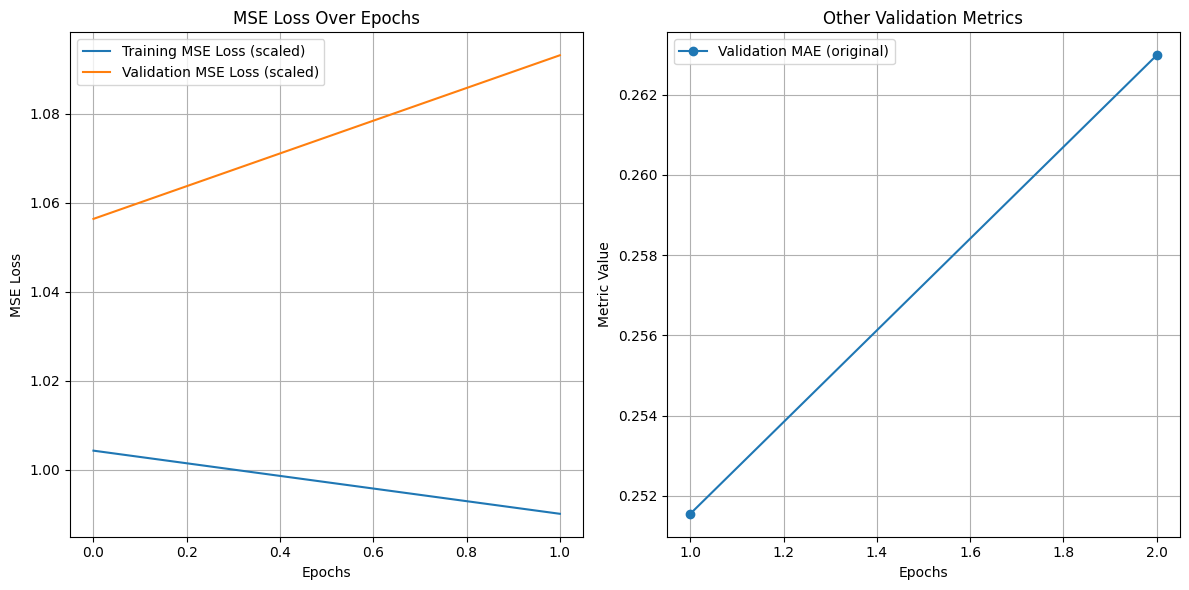


Best Validation Metrics Achieved (based on lowest MSE):
  epoch: 1
  val_mse_scaled: 1.0564
  val_mae_original: 0.2516
  val_r2_original: 0.0216
  val_corr_original: 0.2373


In [ ]:
# Cell 10: Training and Evaluation Loop - REVISED with more evaluation metrics


import torch.amp
from sklearn.metrics import mean_absolute_error, r2_score # For MAE and R2
import numpy as np # For correlation and other numpy ops


train_losses_mse = [] # Storing MSE loss
val_losses_mse = []   # Storing MSE loss
val_metrics_history = [] # To store dicts of all validation metrics


best_val_loss_mse = float('inf') # Tracking best MSE for model saving
patience_counter = 0
PATIENCE_EPOCHS = 5 # Increase if needed, e.g., 5


printed_messages_train_loop = set()
def print_once_train_loop(message):
    global printed_messages_train_loop
    if message not in printed_messages_train_loop:
        print(message)
        printed_messages_train_loop.add(message)


if regressor_model is not None and train_loader is not None and val_loader is not None and optimizer is not None and criterion is not None and 'asl_alt_ratio_scaler' in locals() and asl_alt_ratio_scaler is not None:
    print(f"\nStarting training on device: {device}...")


    if hasattr(regressor_model, 'medgemma_model') and hasattr(regressor_model.medgemma_model, 'dtype'):
        model_activation_dtype = regressor_model.medgemma_model.dtype
    else:
        model_activation_dtype = torch.float16
    print(f"Model's activation dtype (for input pixel_values): {model_activation_dtype}")


    autocast_dtype = torch.float16
    print(f"Using torch.amp.autocast with dtype: {autocast_dtype} on device type: {device.type}")


    # Optional: Add a scheduler
    # from torch.optim.lr_scheduler import CosineAnnealingLR
    # scheduler = CosineAnnealingLR(optimizer, T_max=len(train_loader) * EPOCHS, eta_min=1e-7)




    for epoch in range(EPOCHS):
        regressor_model.train()
        running_train_loss_mse = 0.0
        processed_batches_train = 0


        for i, batch in enumerate(train_loader):
            pixel_values_f32 = batch['pixel_values'].to(device)
            labels_f32 = batch['labels'].to(device)
            pixel_values_casted_for_input = pixel_values_f32.to(model_activation_dtype)
            optimizer.zero_grad()


            with torch.amp.autocast(device_type=device.type, dtype=autocast_dtype, enabled=True):
                try:
                    predictions = regressor_model(pixel_values_casted_for_input)
                    loss_mse = criterion(predictions.to(torch.float32), labels_f32)
                except Exception as e:
                    print_once_train_loop(f"ERROR training batch {i}: {e}")
                    continue
            loss_mse.backward()
            optimizer.step()
            # if 'scheduler' in locals(): scheduler.step() # Step scheduler if using one


            running_train_loss_mse += loss_mse.item()
            processed_batches_train += 1
            if (i + 1) % 20 == 0 or (i + 1) == len(train_loader):
                print(f"Epoch [{epoch+1}/{EPOCHS}], Batch [{i+1}/{len(train_loader)}], Train MSE Loss: {loss_mse.item():.4f}")


        epoch_train_loss_mse = running_train_loss_mse / processed_batches_train if processed_batches_train > 0 else float('nan')
        train_losses_mse.append(epoch_train_loss_mse)
        print(f"Epoch [{epoch+1}/{EPOCHS}] - Average Training MSE Loss: {epoch_train_loss_mse:.4f}")


        # Validation phase
        regressor_model.eval()
        running_val_loss_mse = 0.0
        processed_batches_val = 0


        # Lists to store all predictions and labels for metric calculation
        all_val_predictions_scaled_list = []
        all_val_labels_scaled_list = []


        with torch.no_grad():
            for batch_val in val_loader:
                pixel_values_f32_val = batch_val['pixel_values'].to(device)
                labels_f32_val = batch_val['labels'].to(device) # These are scaled
                pixel_values_casted_for_input_val = pixel_values_f32_val.to(model_activation_dtype)


                with torch.amp.autocast(device_type=device.type, dtype=autocast_dtype, enabled=True):
                    try:
                        predictions_val_scaled = regressor_model(pixel_values_casted_for_input_val) # Scaled predictions
                        loss_mse_val = criterion(predictions_val_scaled.to(torch.float32), labels_f32_val)
                    except Exception as e_val:
                        print_once_train_loop(f"ERROR validating: {e_val}")
                        continue


                running_val_loss_mse += loss_mse_val.item()
                processed_batches_val +=1
                all_val_predictions_scaled_list.append(predictions_val_scaled.cpu()) # Move to CPU for numpy
                all_val_labels_scaled_list.append(labels_f32_val.cpu())


        epoch_val_loss_mse = running_val_loss_mse / processed_batches_val if processed_batches_val > 0 else float('nan')
        val_losses_mse.append(epoch_val_loss_mse)
        print(f"Epoch [{epoch+1}/{EPOCHS}] - Average Validation MSE Loss: {epoch_val_loss_mse:.4f}")


        # Calculate additional metrics on original scale
        if all_val_predictions_scaled_list and all_val_labels_scaled_list:
            all_preds_scaled_np = torch.cat(all_val_predictions_scaled_list).numpy()
            all_labels_scaled_np = torch.cat(all_val_labels_scaled_list).numpy()


            # Inverse transform to original LDL scale
            # Ensure ldl_scaler was fitted and is available (checked at the start of the if block)
            preds_original = asl_alt_ratio_scaler.inverse_transform(all_preds_scaled_np)
            labels_original = asl_alt_ratio_scaler.inverse_transform(all_labels_scaled_np)


            val_mae = mean_absolute_error(labels_original, preds_original)
            val_r2 = r2_score(labels_original, preds_original)
            # Pearson correlation: ensure inputs are 1D arrays
            if preds_original.ndim > 1: preds_original_flat = preds_original.flatten()
            else: preds_original_flat = preds_original
            if labels_original.ndim > 1: labels_original_flat = labels_original.flatten()
            else: labels_original_flat = labels_original


            if len(preds_original_flat) > 1 and len(labels_original_flat) > 1: # Need at least 2 points for correlation
                val_corr = np.corrcoef(labels_original_flat, preds_original_flat)[0, 1]
            else:
                val_corr = float('nan')




            print(f"Epoch [{epoch+1}/{EPOCHS}] Validation MAE (original scale): {val_mae:.2f} mg/dL")
            print(f"Epoch [{epoch+1}/{EPOCHS}] Validation R-squared: {val_r2:.3f}")
            print(f"Epoch [{epoch+1}/{EPOCHS}] Validation Pearson Correlation: {val_corr:.3f}")


            current_metrics = {
                'epoch': epoch + 1,
                'val_mse_scaled': epoch_val_loss_mse,
                'val_mae_original': val_mae,
                'val_r2_original': val_r2,
                'val_corr_original': val_corr
            }
            val_metrics_history.append(current_metrics)
        else:
            print("Not enough data to calculate extended validation metrics.")




        # Early stopping and model saving based on validation MSE loss
        if epoch_val_loss_mse < best_val_loss_mse:
            best_val_loss_mse = epoch_val_loss_mse
            patience_counter = 0
            save_dir = "./best_model_checkpoint"
            if not os.path.exists(save_dir): os.makedirs(save_dir)
            if hasattr(regressor_model, 'medgemma_model') and hasattr(regressor_model.medgemma_model, 'save_pretrained'):
                regressor_model.medgemma_model.save_pretrained(os.path.join(save_dir, "lora_adapters"))
            if hasattr(regressor_model, 'regression_head'):
                torch.save(regressor_model.regression_head.state_dict(), os.path.join(save_dir, "regression_head.pth"))
            print(f"Validation MSE loss improved to {best_val_loss_mse:.4f}. Saved best model components.")
        else:
            patience_counter += 1
        print("-" * 30)
        if patience_counter >= PATIENCE_EPOCHS:
            print(f"Early stopping triggered after {PATIENCE_EPOCHS} epochs without improvement on validation MSE loss.")
            break
    print("Training complete.")
else:
    print("Cannot start training. Critical components missing (model, loaders, optimizer, criterion, or ldl_scaler).")


# Plotting MSE loss
if train_losses_mse and val_losses_mse:
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses_mse, label='Training MSE Loss (scaled)')
    plt.plot(val_losses_mse, label='Validation MSE Loss (scaled)')
    plt.title('MSE Loss Over Epochs')
    plt.xlabel('Epochs'); plt.ylabel('MSE Loss'); plt.legend(); plt.grid(True)


    # Plot other metrics if available
    if val_metrics_history:
        epochs_list = [m['epoch'] for m in val_metrics_history]
        val_mae_list = [m['val_mae_original'] for m in val_metrics_history]
        val_r2_list = [m['val_r2_original'] for m in val_metrics_history]
        val_corr_list = [m['val_corr_original'] for m in val_metrics_history]


        plt.subplot(1, 2, 2)
        plt.plot(epochs_list, val_mae_list, label='Validation MAE (original)', marker='o')
        # You can add R2 and Corr to the same plot or separate plots
        # plt.plot(epochs_list, val_r2_list, label='Validation R2 (original)', marker='x')
        # plt.plot(epochs_list, val_corr_list, label='Validation Corr (original)', marker='s')
        plt.title('Other Validation Metrics')
        plt.xlabel('Epochs'); plt.ylabel('Metric Value'); plt.legend(); plt.grid(True)


    plt.tight_layout()
    plt.show()


# Print best metrics achieved
if val_metrics_history:
    best_epoch_metrics = min(val_metrics_history, key=lambda x: x['val_mse_scaled']) # Or sort by MAE, R2 etc.
    print("\nBest Validation Metrics Achieved (based on lowest MSE):")
    for key, value in best_epoch_metrics.items():
        if isinstance(value, float): print(f"  {key}: {value:.4f}")
        else: print(f"  {key}: {value}")


In [ ]:
# The best model was saved during training. Here's how you might save the *final* model
# if you didn't use early stopping or want the model from the last epoch.

final_model_save_path = "./final_model_checkpoint"
if regressor_model is not None and os.path.exists("./best_model_checkpoint"): # Check if best model was saved
    print(f"\nBest model was saved during training to ./best_model_checkpoint")
    print("To use the best model, load from './best_model_checkpoint/lora_adapters' and './best_model_checkpoint/regression_head.pth'")
elif regressor_model is not None: # Save final model if no best model path exists (e.g. early stopping not triggered or not implemented fully)
    if not os.path.exists(final_model_save_path): os.makedirs(final_model_save_path)
    print(f"\nSaving final model to {final_model_save_path}...")
    # Save LoRA adapters of the base MedGemma model
    regressor_model.medgemma_model.save_pretrained(os.path.join(final_model_save_path, "lora_adapters"))
    # Save the state of the regression head
    torch.save(regressor_model.regression_head.state_dict(), os.path.join(final_model_save_path, "regression_head.pth"))
    print(f"Final LoRA adapters saved to {os.path.join(final_model_save_path, 'lora_adapters')}")
    print(f"Final regression head state saved to {os.path.join(final_model_save_path, 'regression_head.pth')}")
else:
    print("\nNo model to save or best model already indicated.")


# --- How to load the saved (best or final) model for inference ---
# This demonstrates loading the components back.

# 1. Define the path to your saved components (e.g., best model)
saved_lora_path = "./best_model_checkpoint/lora_adapters" # Or final_model_save_path + "/lora_adapters"
saved_head_path = "./best_model_checkpoint/regression_head.pth" # Or final_model_save_path + "/regression_head.pth"

if os.path.exists(saved_lora_path) and os.path.exists(saved_head_path) and vision_feature_dim is not None:
    print(f"\n--- Example: Loading saved model components from {saved_lora_path} and {saved_head_path} ---")
    # A. Load the base MedGemma model (without PEFT initially, or it will try to load adapters from original HF name)
    #    It's often cleaner to load the base and then apply PEFT adapters.
    #    However, Unsloth's `from_pretrained` on a PEFT saved path should work.

    print(f"Loading base MedGemma model ({selected_model_name}) and then applying saved LoRA adapters from {saved_lora_path}...")

    loaded_base_model, loaded_tokenizer = FastLanguageModel.from_pretrained(
        model_name=selected_model_name, # Start with the original base model name
        max_seq_length=2048,
        dtype=None,
        load_in_4bit=True,
        # token = "hf_..."
    )

    # Now, apply the saved LoRA adapters
    # Important: The `PeftModel.from_pretrained` expects the *base model* and the path to adapters.
    from peft import PeftModel
    loaded_peft_medgemma_model = PeftModel.from_pretrained(loaded_base_model, saved_lora_path)
    print("PEFT MedGemma model with saved LoRA adapters loaded.")

    # B. Instantiate your RegressorModel wrapper with the loaded PEFT MedGemma
    loaded_regressor_model = MedGemmaVisionRegressor(loaded_peft_medgemma_model, vision_feature_dim)

    # C. Load the state_dict for the regression head
    loaded_regressor_model.regression_head.load_state_dict(torch.load(saved_head_path, map_location=device))
    print("Regression head state loaded.")

    loaded_regressor_model.to(device)
    loaded_regressor_model.eval() # Set to evaluation mode
    print("Complete RegressorModel loaded and ready for inference.")

    # Example inference (requires a sample from val_loader or test_loader)
    if val_loader:
        try:
            sample_batch_inference = next(iter(val_loader))
            pixel_values_inf = sample_batch_inference['pixel_values'].to(device)
            labels_inf = sample_batch_inference['labels'].to(device)
            with torch.no_grad():
                predictions_inf = loaded_regressor_model(pixel_values_inf)
            print(f"\nSample inference output shape: {predictions_inf.shape}")
            # You would then unscale predictions using ldl_scaler.inverse_transform()
            if asl_alt_ratio_scaler:
                 predicted_asl_alt_ratio_original_scale = asl_alt_ratio_scaler.inverse_transform(predictions_inf.cpu().numpy())
                 actual_asl_alt_ratio_original_scale = asl_alt_ratio_scaler.inverse_transform(labels_inf.cpu().numpy())
                 print(f"Sample predictions (original scale): {predicted_asl_alt_ratio_original_scale[:5].flatten()}")
                 print(f"Sample actuals (original scale):    {actual_asl_alt_ratio_original_scale[:5].flatten()}")

        except Exception as e:
            print(f"Error during sample inference with loaded model: {e}")
else:
    print("\nSkipping demonstration of loading model as saved paths or vision_feature_dim not found.")


print("\nCell 11: Model saving and loading example complete.")
print("\n--- End of Script ---")


Best model was saved during training to ./best_model_checkpoint
To use the best model, load from './best_model_checkpoint/lora_adapters' and './best_model_checkpoint/regression_head.pth'

--- Example: Loading saved model components from ./best_model_checkpoint/lora_adapters and ./best_model_checkpoint/regression_head.pth ---
Loading base MedGemma model (google/medgemma-4b-pt) and then applying saved LoRA adapters from ./best_model_checkpoint/lora_adapters...
==((====))==  Unsloth 2025.6.1: Fast Gemma3 patching. Transformers: 4.52.4.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Using float16 precision for gemma3 won't work! Using float32.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

PEFT MedGemma model with saved LoRA adapters loaded.
[Regressor Init] Base PEFT model target dtype: torch.bfloat16
[Regressor Init] WARNING: Base model dtype is torch.bfloat16, not float16. Casting regression_head to torch.bfloat16 anyway.
Regression head state loaded.
Complete RegressorModel loaded and ready for inference.
Error during sample inference with loaded model: expected scalar type BFloat16 but found Float

Cell 11: Model saving and loading example complete.

--- End of Script ---
